<a href="https://colab.research.google.com/github/MaheepChaudhary/Tourist-Guide/blob/master/Virtual_Tourise_Guide_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Installing patool to extract compressed files
!pip install patool
import os
import patoolib
patoolib.extract_archive("all_data_test.rar")
patoolib.extract_archive("all_data_train.rar")

patool: Extracting all_data_test.rar ...
patool: running /usr/bin/unrar x -- /content/all_data_test.rar
patool:     with cwd='./Unpack_gynmcdds'
patool: ... all_data_test.rar extracted to `all_data_test1' (local file exists).
patool: Extracting all_data_train.rar ...
patool: running /usr/bin/unrar x -- /content/all_data_train.rar
patool:     with cwd='./Unpack__irz548l'
patool: ... all_data_train.rar extracted to `all_data_train1' (local file exists).


'all_data_train1'

In [0]:
# Importing the necessary packages
import numpy as np
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt

In [0]:
# Making the training data 
training_data = []
X_train = []
y_train = []

labels = ['taj mahal', 'statue of liberty', 'Eiffel Tower']


for i in os.listdir('/content/all_data_train'):
  img = cv2.imread("/content/all_data_train/"+str(i), cv2.IMREAD_GRAYSCALE)
  # Choosing the label by checking the name of the image
  if i[:9] == 'taj mahal':
    lable = 0
  elif i[:17] == 'statue of liberty': 
    lable = 1
  elif i[:12] == 'Eiffel_Tower':
    lable = 2
  # Training data has X_train and y_train both as img and label
  training_data.append([img, lable])

# Shuffling the data for more accurate training  
np.random.shuffle(training_data)

# Normalizing and adding the image to X_train and y_train
for image, lable in training_data:
  image = tf.keras.utils.normalize(image)
  X_train.append(image)
  y_train.append(lable)

# Arranging the image data in a proper format 
X_train = np.array(X_train).reshape(-1, 96, 96, 1)

In [0]:
# Preparing test data as training data is prepared above
testing_data = []
X_test = []
y_test = []

labels = ['taj mahal', 'statue of liberty', 'Eiffel Tower']

for i in os.listdir("/content/all_data_test"):
  img = cv2.imread("/content/all_data_test/"+str(i), cv2.IMREAD_GRAYSCALE)

  if i[:9] == 'taj mahal':
    lable = 0
  elif i[:17] == 'statue of liberty':
    lable = 1
  elif i[:12] == 'Eiffel_Tower':
    lable = 2
  testing_data.append([img, lable])

np.random.shuffle(testing_data)
for image, lable in testing_data:
  image = tf.keras.utils.normalize(image)
  X_test.append(image)
  y_test.append(lable)

X_test = np.array(X_test).reshape(-1, 96, 96, 1)


In [0]:
# Making the model using Convolutional Neural Network and Maxpooling
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))


In [0]:
# Compiling the model
model.compile( optimizer = "adam", loss = "sparse_categorical_crossentropy",  metrics = ["accuracy"])

In [0]:
# training the model and also evaluating the model on test data
mymod = model.fit(X_train, y_train, epochs=10, validation_split = 0.2)
_,accuracy = model.evaluate(X_test,y_test)
  


Train on 2197 samples, validate on 550 samples
Epoch 1/10
2197/2197 [==============================] - 32s 15ms/sample - loss: 0.0888 - acc: 0.9786 - val_loss: 0.2510 - val_acc: 0.9418
Epoch 2/10
2197/2197 [==============================] - 32s 15ms/sample - loss: 0.0184 - acc: 0.9959 - val_loss: 0.2268 - val_acc: 0.9473
Epoch 3/10
2197/2197 [==============================] - 32s 15ms/sample - loss: 0.0078 - acc: 0.9977 - val_loss: 0.2396 - val_acc: 0.9473
Epoch 4/10
2197/2197 [==============================] - 32s 15ms/sample - loss: 0.0057 - acc: 0.9982 - val_loss: 0.2565 - val_acc: 0.9509
Epoch 5/10
2197/2197 [==============================] - 32s 15ms/sample - loss: 0.0052 - acc: 0.9977 - val_loss: 0.2438 - val_acc: 0.9527
Epoch 6/10
2197/2197 [==============================] - 32s 15ms/sample - loss: 0.0037 - acc: 0.9977 - val_loss: 0.2627 - val_acc: 0.9509
Epoch 7/10
2197/2197 [==============================] - 32s 15ms/sample - loss: 0.0053 - acc: 0.9986 - val_loss: 0.2519 - val

The accuracy on the test set is:- 0.9852941


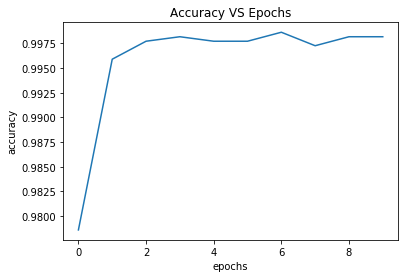

In [0]:
# Printing the accuracy on the training data
print("The accuracy on the test set is:-",accuracy)
# Plotting the graph of training accuracy VS epochs
plt.plot(mymod.history["acc"])
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.title("Accuracy VS Epochs")
plt.show()